# Diabetes Patients Prediction Project
### MeriSKILL 2nd Project

Objective: The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

### Importing Necessary Libraries

In [43]:
# Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Other Libraries
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [12]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabetes_df.shape

(768, 9)

## EDA
### Inspect the structure of the dataset

In [15]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are two data types; int and float. There are no null values in the columns.
### Check null values in the columns

In [16]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check duplicates in the dataset

In [17]:
diabetes_df.duplicated().sum()

0

There are no duplicates rows in the dataset.
### Check dataset statistics

In [18]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose, BloodPressure, SkinThickness, Insulin and BMI all have minimum value to be zero which is not possible. We go ahead to fill the zeros in these columns with the median of the said columns.

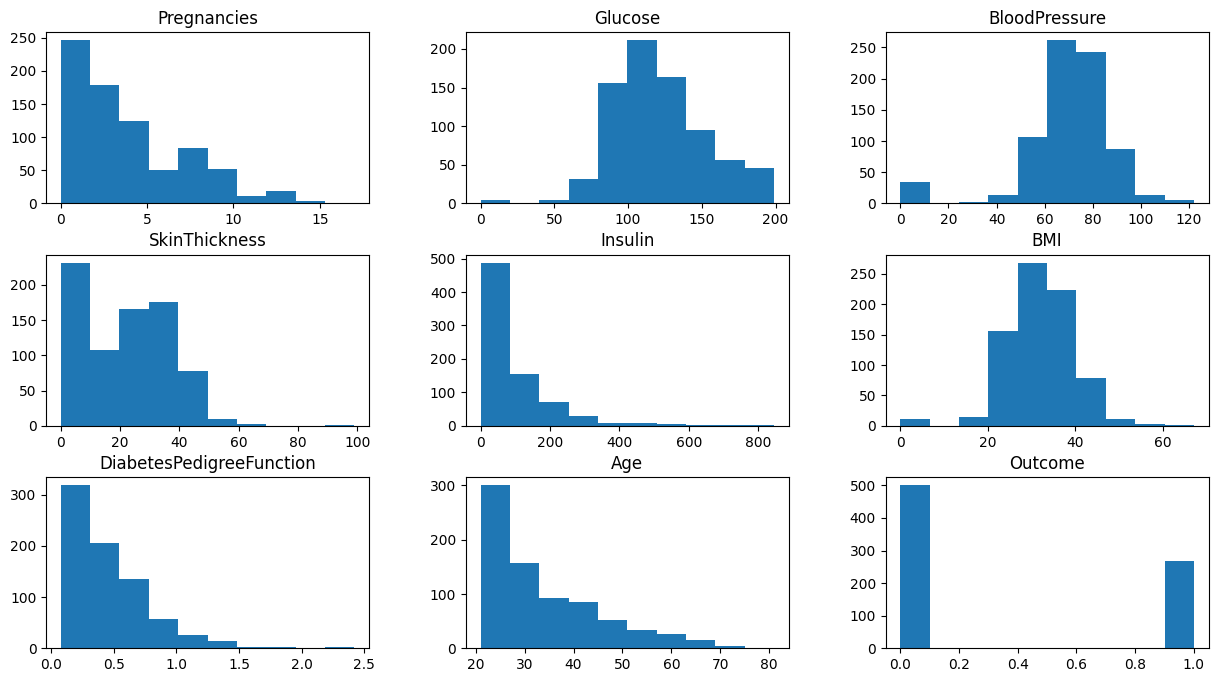

In [19]:
diabetes_df.hist(figsize=(15, 8), grid=False);

We see the distribution of our columns

<Axes: >

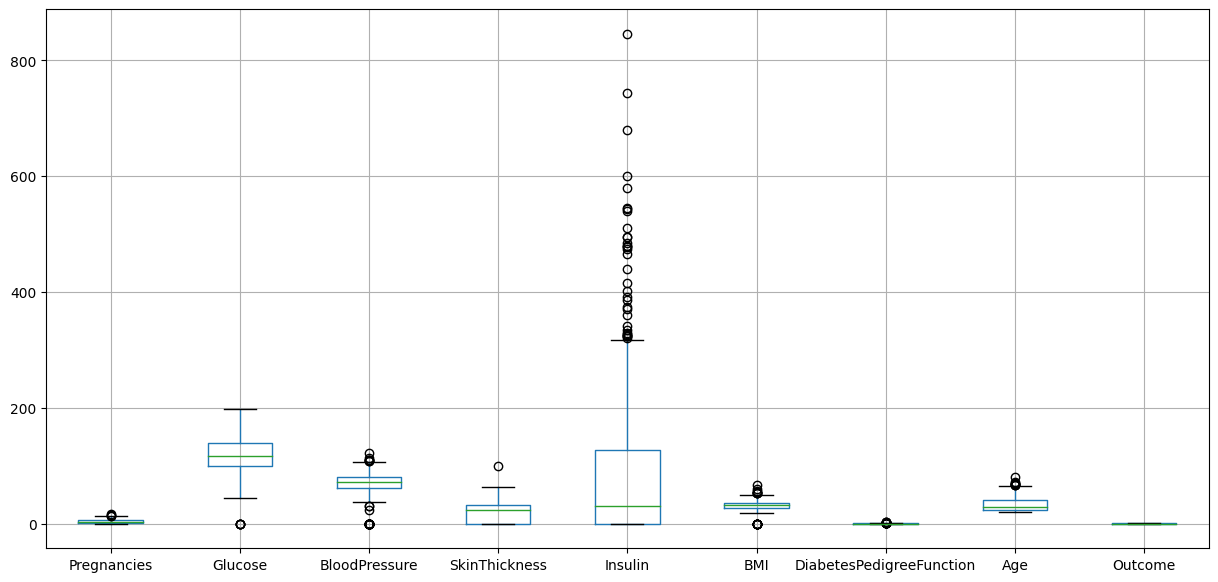

In [20]:
diabetes_df.boxplot(figsize=(15, 7))

Glucose, BloodPressure, SkinThickness, Insulin, and BMI's zero values are filled with their respective averages since the values for these columns connot be zero, for example you can check the link attached. [Insulin Values](https://www.medicinenet.com/what_is_a_high_insulin_level/article.htm)

### Data Preparation

Data Cleaning

In [22]:
mean_insulin = diabetes_df.where(diabetes_df['Insulin'] > 0)['Insulin'].mean()

diabetes_df.loc[diabetes_df['Insulin'] == 0, 'Insulin'] = mean_insulin

In [23]:
mean_bloodpressure = diabetes_df.where(diabetes_df['BloodPressure'] > 0)['BloodPressure'].mean()

diabetes_df.loc[diabetes_df['BloodPressure'] == 0, 'BloodPressure'] = mean_bloodpressure

In [24]:
mean_BMI = diabetes_df.where(diabetes_df['BMI'] > 0)['BMI'].mean()

diabetes_df.loc[diabetes_df['BMI'] == 0, 'BMI'] = mean_BMI

In [25]:
mean_glucose = diabetes_df.where(diabetes_df['Glucose'] > 0)['Glucose'].mean()

diabetes_df.loc[diabetes_df['Glucose'] == 0, 'Glucose'] = mean_glucose

In [26]:
mean_skinthinkness = diabetes_df.where(diabetes_df['SkinThickness'] > 0)['SkinThickness'].mean()

diabetes_df.loc[diabetes_df['SkinThickness'] == 0, 'SkinThickness'] = mean_skinthinkness

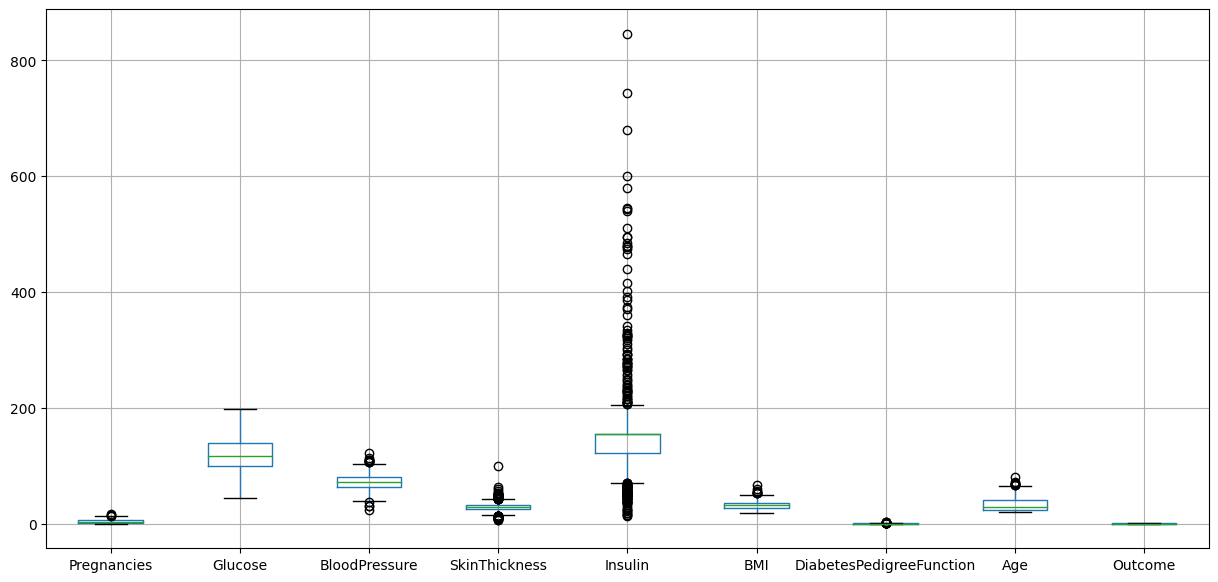

In [28]:
diabetes_df.boxplot(figsize=(15, 7));

Considering the factors which contributes to a person being diabetic or not, we can't consider the extreeme values as outliers but instead it is an indication that our valaues are widely spread.

In [29]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


Inspect the describe table again to ensure the changes have been implemented

In [30]:
diabetes_df.corr().tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.0


We inspect the relationship between each column and the outcome


View the count of values in the outcome column

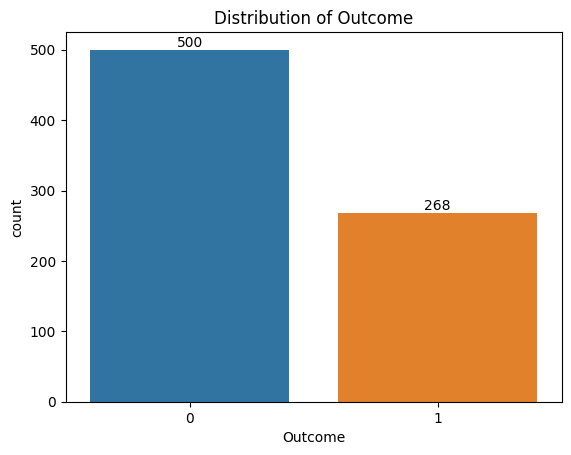

In [31]:
ax = sns.countplot(data=diabetes_df, x='Outcome')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Outcome')
plt.show()

0 - represents Non-diabetic, 1 - represents Diabetic

### Given the critical nature of early diabetes detection and its impact on patient outcomes, our objective is to develop a highly accurate predictive model with a minimum overall accuracy of 90% and a macro average of at least 85%. This emphasis on accuracy stems from the urgency of timely diagnosis and intervention to ensure the best possible health outcomes for individuals affected by diabetes.

## Divide data into training and testing data

In [33]:
X = diabetes_df.drop(['Outcome'], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [34]:
y = diabetes_df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

In [37]:
X_train.shape

(614, 8)

In [38]:
y_train.shape

(614,)

In [39]:
X_test.shape

(154, 8)

In [40]:
y_test.shape

(154,)

## Modeling

Random Classification

In [41]:
rfc_clf =  RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
cr_y_pred = rfc_clf.predict(X_test)

cnf_mx = confusion_matrix(y_test, cr_y_pred)
print(cnf_mx)

[[84 14]
 [30 26]]


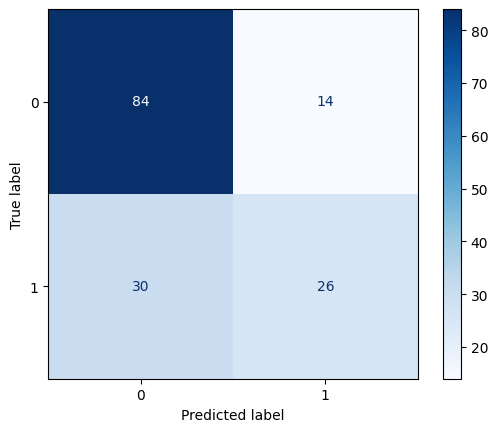

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, cr_y_pred, cmap='Blues');

In [45]:
print(classification_report(y_test, cr_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        98
           1       0.65      0.46      0.54        56

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.71      0.70       154



KNN Classification

In [46]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
kn_y_pred = knc.predict(X_test)
cnf_mx = confusion_matrix(y_test, kn_y_pred)
print(cnf_mx)

[[81 17]
 [33 23]]


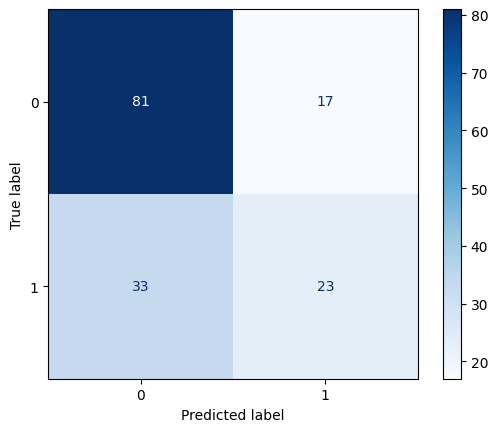

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, kn_y_pred, cmap='Blues');

In [49]:
print(classification_report(y_test, kn_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        98
           1       0.57      0.41      0.48        56

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.66      0.68      0.66       154



Decision Tree Classification

In [50]:
dcf = DecisionTreeClassifier(random_state=42)
dcf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
dcf_y_pred = dcf.predict(X_test)
cnf_mx = confusion_matrix(y_test, dcf_y_pred)
print(cnf_mx)

[[78 20]
 [27 29]]


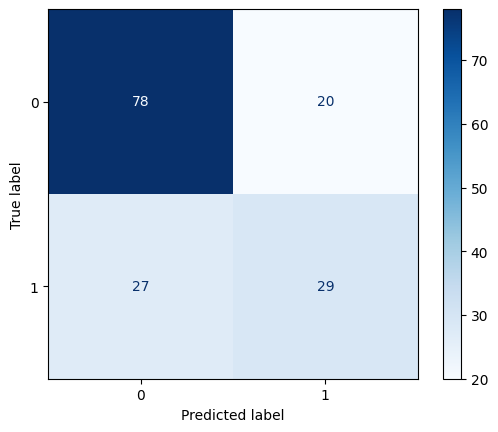

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, dcf_y_pred, cmap='Blues');

In [53]:
print(classification_report(y_test, dcf_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        98
           1       0.59      0.52      0.55        56

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



Conclusion: Comparing the model accuracy and macro average for our models to our goal, we can't settle on choosing any of the models as a best prediction model since it doesn't meet our goal.

Recommendations:

- More data must be collected to enhance the prediction model.